# Exercise 4 

## Some Theory

For the data in this exercise the dose-response relation can be modelled as logit(θi)=α+βxi.


The liklihood for each group for such a model is:

$p(y_i|\alpha,\beta,n_i,x_i) \propto [\text{logit}^{-1}(\alpha+\beta x_i)]^{y_i}[\text{logit}^{-1}(\alpha+\beta x_i)]^{n_i-y_i}$

Given the prior distribution of the parameters $p(\alpha,\beta)$ it is also possible to compute their posterior distribution as:

$p(\alpha,\beta|y,n,x) \propto p(\alpha,\beta)\prod_{i-1}^k p(y_i|\alpha,\beta,n_i,x_i)$

## 4.a

In [1]:
%matplotlib inline
from scipy.stats import multivariate_normal
from scipy.special import expit  # aka logistic
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from utilities_and_data import plot_tools

In [2]:
# edit default plot settings
plt.rc('font', size=12)
# apply custom background plotting style
plt.style.use(plot_tools.custom_styles['gray_background'])

In [3]:
# Data from the Animal trials
x = np.array([-0.86, -0.30, -0.05, 0.73])
n = np.array([5, 5, 5, 5])
y = np.array([0, 1, 3, 5])

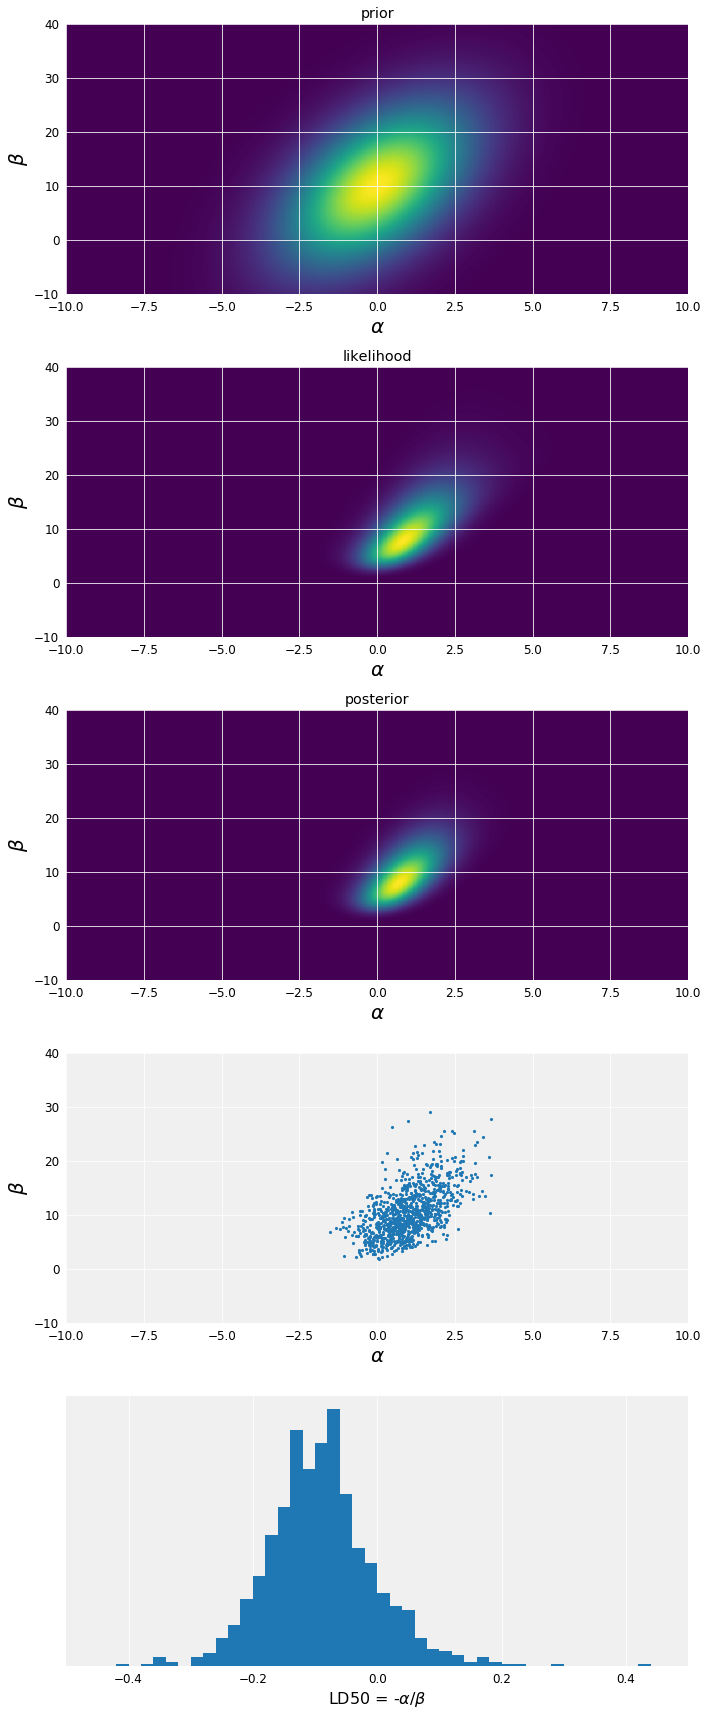

-0.0894483548711
0.00756591955043
p(beta>0|x,y) > 999/1000


In [4]:
alpha_mean = 0
alpha_var = 2**2
beta_mean = 10
beta_var = 10**2
corr = 0.5
cov = np.sqrt(alpha_var) * np.sqrt(beta_var) * corr

N = 500
A = np.linspace(-10, 10, N)
B = np.linspace(-10, 40, N)
AB = np.dstack(np.meshgrid(A, B))
prior = multivariate_normal.pdf(AB, [alpha_mean, beta_mean], [[alpha_var, cov], [cov, beta_var]])

theta = 1 / (np.exp(-(A[:, None] + B[:, None, None] * x)) + 1)
loglike = np.sum(np.log(theta ** y * (1 - theta) ** (n - y)), axis=2)
logp = loglike + np.log(prior)
logp -= logp.max()
p = np.exp(logp)
p = p/np.sum(p)

# sample from the grid
nsamp = 1000
samp_indices = np.unravel_index(
    np.random.choice(p.size, size=nsamp, p=p.ravel()),
    p.shape
)
samp_A = A[samp_indices[1]]
samp_B = B[samp_indices[0]]
# add random jitter, see BDA3 p. 76
samp_A += (np.random.rand(nsamp) - 0.5) * (A[1] - A[0])
samp_B += (np.random.rand(nsamp) - 0.5) * (B[1] - B[0])

# samples of LD50 conditional beta > 0
bpi = samp_B > 0
samp_ld50 = -samp_A[bpi] / samp_B[bpi]

# ====== Plotting
plt.figure(figsize=(10, 24))

plt.subplot(5, 1, 1)
plt.imshow(prior, origin='lower', aspect='auto', extent=(A[0], A[-1], B[0], B[-1]), interpolation='none')
plt.xlim([A[0], A[-1]])
plt.ylim([B[0], B[-1]])
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\beta$', fontsize=20)
plt.title('prior')

plt.subplot(5, 1, 2)
plt.imshow(np.exp(loglike), origin='lower', aspect='auto', extent=(A[0], A[-1], B[0], B[-1]), interpolation='none')
plt.xlim([A[0], A[-1]])
plt.ylim([B[0], B[-1]])
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\beta$', fontsize=20)
plt.title('likelihood')

plt.subplot(5, 1, 3)
plt.imshow(p, origin='lower', aspect='auto', extent=(A[0], A[-1], B[0], B[-1]), interpolation='none')
plt.xlim([A[0], A[-1]])
plt.ylim([B[0], B[-1]])
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\beta$', fontsize=20)
plt.title('posterior')
    
# plot the samples
plt.subplot(5, 1, 4)
plt.scatter(samp_A, samp_B, 10, linewidth=0)
plt.xlim([A[0], A[-1]])
plt.ylim([B[0], B[-1]])
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\beta$', fontsize=20)

# plot the histogram of LD50
plt.subplot(5, 1, 5)
plt.hist(samp_ld50, np.arange(-0.5, 0.51, 0.02))
plt.xlim([-0.5, 0.5])
plt.xlabel(r'LD50 = -$\alpha/\beta$', fontsize=16)
plt.yticks(())
plt.tight_layout()
plt.show()

print(np.mean(samp_ld50))
print(np.var(samp_ld50))

print("p(beta>0|x,y) > %d/%d" % ((np.sum(samp_B>0)-1), samp_B.size))

## 4.b

Looking at the conture plots you can see that the posterior has been rounded in respect to the likelihood. this rounding is provided by the oval prior

## 4.c

From the 1000 draws of the posterior distribution, it is possible to estimate p(β>0|x,n,y),
that is the probability that the drug is harmful. Since of the 1000 draws all of them had positive
values of β, that probability is roughly estimated to exceed 0.999.